In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit import Minuit

## Setting matplotlib
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'axes.facecolor':'w'})
mpl.rcParams.update({'axes.edgecolor':'k'})
mpl.rcParams.update({'figure.facecolor':'w'})
mpl.rcParams.update({'figure.edgecolor':'w'})
mpl.rcParams.update({'axes.grid':True})
mpl.rcParams.update({'grid.linestyle':':'})
mpl.rcParams.update({'figure.figsize':[12,9]})

#source codeの表示用
from inspect import getsource

# fitting 1-2
点にそれぞれ異なるエラーが乗っている場合について

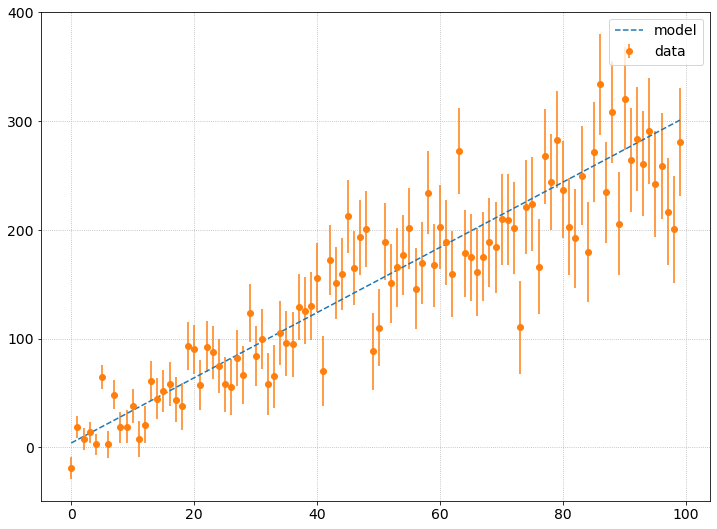

In [18]:
a_model = 3
b_model = 4

xdata = np.arange(0, 100, 1)

#それぞれのデータ点にerrorbarを乗せる
err_model = np.maximum(5*np.sqrt(xdata), 10)

ymodel = a_model*xdata + b_model
ydata = a_model * xdata + b_model + err_model*np.random.randn(len(xdata))

plt.plot(xdata, ymodel, "--", label="model")
plt.errorbar(xdata, ydata, yerr=err_model, fmt="o", label="data")
plt.legend()

# fitting関数を定義する

In [19]:
def fitfunc(x, a, b):
    return a*x + b

# fittingを行う
一番初めにcost関数(=χ二乗)を定義している。

モデル化を行う際に必要な引数は、
* cost関数: ここではχ二乗
* parameterの初期値: fittingによっては予め大雑把に決めておく必要がある
* errordef: uncertaintyを決めるために必要。χ二乗を最小化する場合にはχ二乗が最小値から1上がる場所が1σなので1に設定する。

である。

In [20]:
#最小化を行う関数を定義
def fit(xdata, ydata, yerr, a_init, b_init):
    def cost(a, b):
        return np.sum((ydata - fitfunc(xdata, a, b))**2 / yerr**2)
    
    #minuitによるfitに必要なパラメータを定義
    error_a = 0.1*a_init
    error_b = 0.1*b_init
    
    #最小化するモデルを定義
    m = Minuit(cost, errordef=1,
              a = a_init, error_a=error_a,
              b = b_init, error_b=error_b)
    
    return m

#実際に最小化を行う
m = fit(xdata=xdata, ydata=ydata, yerr=err_model, a_init=1, b_init=1)
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 114.8                      │        Ncalls = 31 (31 total)        │
│ EDM = 3.07e-22 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   2.88    │   0.10    │            │            │         │         │       │
│ 1 │ b    │    5.3    │    3.2    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

# fittingの結果をプロット

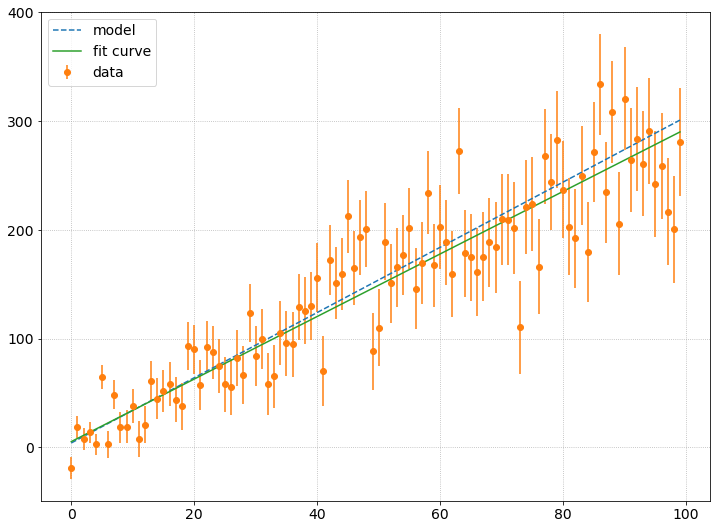

In [21]:
plt.plot(xdata, ymodel, "--", label="model")
plt.errorbar(xdata, ydata, yerr=err_model, fmt="o", label="data")
plt.plot(xdata, fitfunc(xdata, *m.values.values()), label="fit curve")
plt.legend()

# reduced chisqの計算

In [27]:
m.fval / (len(ydata) - m.nfit)

1.1716328795385682

# Minosによるerrorの見積もり

In [28]:
m.minos()

┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.1    │    0.1    │   -3.2    │    3.2    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘

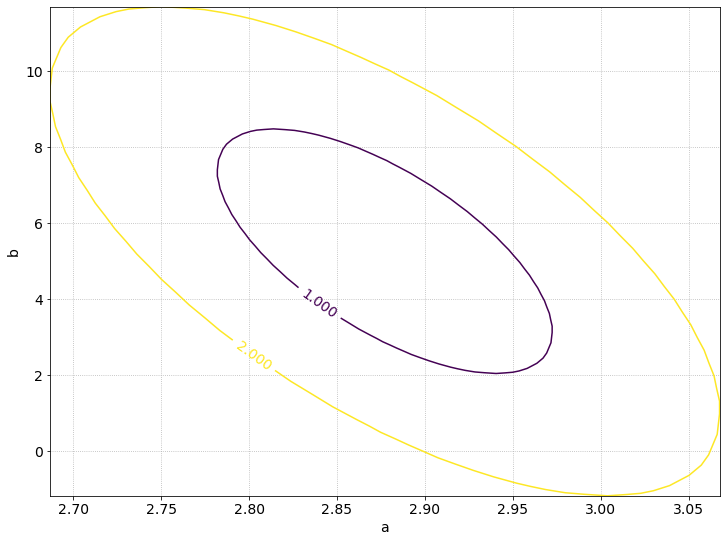

In [29]:
m.draw_mncontour('a','b', nsigma=2)

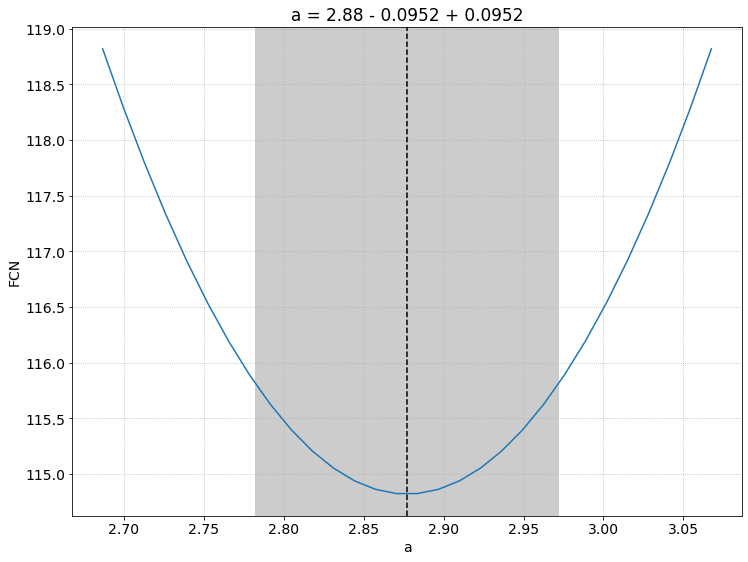

In [30]:
m.draw_mnprofile('a');